<a href="https://colab.research.google.com/github/AvishekhDas/Main/blob/master/Avishekh_Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [93]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, concatenate, add, ZeroPadding1D, Reshape, merge
from keras.layers.convolutional import Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.layers import Flatten, GlobalAveragePooling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Dense, Lambda

2019-06-18 18:13:35.203442


In [94]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-18 18:13:35.219739


### Load pre-shuffled MNIST data into train and test sets

In [95]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-18 18:13:35.535288


(60000, 28, 28)
2019-06-18 18:13:35.565923


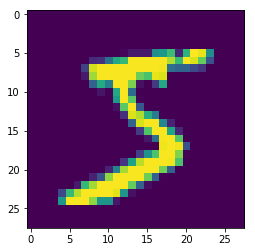

In [96]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [97]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-18 18:13:35.724792


In [98]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-18 18:13:35.920747


In [99]:
y_train[:10]
print(datetime.datetime.now())

2019-06-18 18:13:35.929180


In [100]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-18 18:13:35.941911


In [101]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-18 18:13:35.947861


In [102]:
## MAIN BLOCK

def space_to_depth_x2(x):
  return tf.space_to_depth(x, block_size=2)


x1 = Input(shape=(28,28,1), name='inputlayer')

x2= Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x2")(x1)
concat1 = add([x1, x2])
x3 = Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x3")(concat1)
concat2 = add([x1, x2, x3])
x4 = MaxPooling2D(pool_size=(2,2), name="x4")(concat2)
x5 = Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x5")(x4)
concat3 = add([x4, x5])
x6 = Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x6")(concat3)
concat4 = add([x4, x5, x6])
x7 = Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x7")(concat4)
concat5 = add([x5, x6, x7])
x8 = MaxPooling2D(pool_size=(2,2), name="x8")(concat5)
x9 = Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x9")(x8)
concat6 = add([x8, x9])
x10 = Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x10")(concat6)
concat7 = add([x8, x9, x10])
x11 = Conv2D(32, kernel_size=(3,3), activation='relu', border_mode='same', name="x11")(concat7)

x12 = Conv2D(10, kernel_size=(7,7), activation='relu', name="x12")(x11)

xflat = Flatten()(x12)
output = Activation('softmax')(xflat)

model = Model(inputs=x1, outputs=output)
model.summary()

print(datetime.datetime.now())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputlayer (InputLayer)         (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
x2 (Conv2D)                     (None, 28, 28, 32)   320         inputlayer[0][0]                 
__________________________________________________________________________________________________
add_51 (Add)                    (None, 28, 28, 32)   0           inputlayer[0][0]                 
                                                                 x2[0][0]                         
__________________________________________________________________________________________________
x3 (Conv2D)                     (None, 28, 28, 32)   9248        add_51[0][0]                     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", name="x2", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", name="x3", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", name="x5", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", name="x6", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarn

In [103]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-18 18:13:36.184383


In [104]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 16s 259us/step - loss: 1.4430 - acc: 0.4035
Epoch 2/10
60000/60000 [==============================] - 15s 244us/step - loss: 1.2051 - acc: 0.4910
Epoch 3/10
60000/60000 [==============================] - 14s 240us/step - loss: 1.1929 - acc: 0.4929
Epoch 4/10
60000/60000 [==============================] - 15s 247us/step - loss: 1.0680 - acc: 0.5476
Epoch 5/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.9504 - acc: 0.5975
Epoch 6/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.9449 - acc: 0.5981
Epoch 7/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.9415 - acc: 0.5984
Epoch 8/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.9393 - acc: 0.5985
Epoch 9/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.9375 - acc: 0.5988
Epoch 10/10
60000/60000 [==============================] - 14s 241us/step - loss: 

In [105]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-18 18:16:04.695518


In [106]:
print(score)
print(datetime.datetime.now())

[0.947069901752472, 0.6]
2019-06-18 18:16:04.707087
